# Import Libraries and Packages and Dataset

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import warnings
from wordcloud import WordCloud
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=SettingWithCopyWarning)
%matplotlib inline

In [2]:
cd Desktop/Nutrition Datasets

C:\Users\i816634\Desktop\Nutrition Datasets


In [3]:
df = pd.read_csv("zomato.csv")

# Getting a Glimpse

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning and Feature Selection

In [8]:
df.isnull().sum(axis=0)

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

First thing I liked to address is the '[]' that is present in the menu_item column of the dataframe. Results show 0 null values for that feature even though there is an empty list. Let's see if there is more than just an empty list.

In [9]:
df['menu_item'].unique()[:3]

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

It looks like the column features a list of all items in the menu for that restaurant. However, we have the 'cuisines' and 'dish_liked' features that will allow us to figure out whether people in Bangalore like that cuisine and which particular item(s) they liked. But first, let's see how many observations have an empty list for the 'menu_item'.

In [10]:
df['menu_item'].value_counts().nlargest(3)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

As suspected, there are a lot of empty lists. But no matter, since, we will be dropping that column anyways.

In [11]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

Each entry for this feature presents a list of extensive reviews written by customers separated by tuples per review. This may be of use when we try to determine specifically and descriptively WHY customers like that restaurant. We can account for key words that appear frequently in the review (such as 'good', 'parking, 'standout'). More on this later.

In [12]:
features = [
    'name','online_order','book_table','rate','votes',
    'location','rest_type','dish_liked','cuisines',
    'approx_cost(for two people)','reviews_list',
    'listed_in(type)','listed_in(city)'
]

df = df[features]

It would be unwise for us to select the number of rows to drop based on the column with the highest null value. In our case, that column turns out to be 'dish_liked'. We need not remove half the dataset for that feature that does not have any relevancy to some of the analysis we are about to perform (such as "What are the top-rated restaurants?","How many restaurant types are there?"). Instead, we can create a copy of the dataframe with a subset of the features, drop the null values for that dataframe, and then, proceed to data exploration. Therefore, data cleaning will be performed on multiple separate dataframes.


With that said, one variable that is the most important would be the 'rate'. Why? Because the overall rating is based on all the features collectively, therefore, we are primarily determining the worth of a restaurant based on how well the restaurant is rated while considering each variable ("Is it too far?" or "Does it cost too much?" or "Do people have strong feelings on particular cuisines?"). In other words, for example, the location or availability of online order are of no concern if there is no rating for that restaurant. Due to the importance of the existence of rate, some of the analysis we will perform will require some observations with non-null values to be dropped. 


But first, let's clean up the rate column by: 
1. Separating the overall rates from the max rates.
2. Accounting for any non numerical values.

In [13]:
split_rate = df["rate"].str.split('/',expand=True)[0]
df["rate"] = split_rate
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Looks like there are couple of miscellaneous values in the rate column ('NEW' and '-'). Let's take a closer look at those.

In [14]:
misc = ["NEW", '-']
for m in misc:
    print("Dataframe with only {} in rate column".format(m),'\n')
    print(df[df["rate"]== m].head(n=3),'\n\n')

Dataframe with only NEW in rate column 

                      name online_order book_table rate  votes      location  \
72           Spicy Tandoor           No         No  NEW      0  Banashankari   
75   Om Sri Vinayaka Chats           No         No  NEW      0  Banashankari   
110    Hari Super Sandwich           No         No  NEW      0  Banashankari   

              rest_type dish_liked                    cuisines  \
72          Quick Bites        NaN                North Indian   
75   Takeaway, Delivery        NaN      Street Food, Fast Food   
110  Takeaway, Delivery        NaN  Sandwich, Pizza, Beverages   

    approx_cost(for two people)  \
72                          150   
75                          500   
110                         200   

                                          reviews_list listed_in(type)  \
72   [('Rated 4.0', 'RATED\n  cost for chicken roll...        Delivery   
75                                                  []        Delivery   
110  [('Ra

Turns out that the two values have 1 thing in common, they both have 0 votes! However, the difference is that if the restaurant is '-', then the restaurant has already been established for some time but none of the people who dined in chose to write a review or vote. 'NEW' is pretty self-explanatory, a brand new restaurant that just opened up. We can use these for any data exploration that does not have rate involved, but for anything rate involved, we should drop these observations. 

In [15]:
drop_misc = df.index[(df["rate"]=='NEW') | (df["rate"]=='-')].tolist()
print("Total observations removed from miscellaneous values:",len(drop_misc))
print("Total null rate values removed:",df['rate'].isnull().sum(axis=0))

df_rate = df.dropna(axis=0, subset=['rate']).drop(index=drop_misc)
df_rate["rate"]=df_rate["rate"].astype("float") # Switch datatype to float.
print("Grand total observations removed:",len(df)-len(df_rate))
df_rate.shape

Total observations removed from miscellaneous values: 2277
Total null rate values removed: 7775
Grand total observations removed: 10052


(41665, 13)

In [16]:
print(df_rate["approx_cost(for two people)"].unique(),'\n')
print(df_rate["approx_cost(for two people)"].dtype)
df_rate["approx_cost(for two people)"].isnull().sum(axis=0)

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '1,100' '1,600' '230' '130' '1,700' '1,350' '2,200' '1,400' '2,000'
 '1,800' nan '1,900' '180' '330' '2,500' '2,100' '3,000' '2,800' '3,400'
 '50' '40' '1,250' '3,500' '4,000' '2,400' '2,600' '1,450' '70' '3,200'
 '240' '6,000' '1,050' '2,300' '4,100' '120' '5,000' '3,700' '1,650'
 '2,700' '4,500' '80'] 

object


247

After dropping all the missing rates, there seems to be 247 missing values for the approx_cost. Let's drop those as well. Also we got to separate the ',' and convert into float datatype for the "approx_cost" feature.

In [17]:
df_rate = df_rate.dropna(axis=0, subset=['approx_cost(for two people)'])
df_rate["approx_cost(for two people)"]=df_rate["approx_cost(for two people)"].apply(lambda x: float(x.replace(',','')))

# Important Note:


Due to multiple filtering of the original dataframe, there will be numerous dataframes depending on the analysis performed in the dataset. Be aware that all these subset of dataframes are derived from either the original (df) or the rate-filtered (df_rate) dataframes. The latter will be used whenever the 'rate' feature is included. I will mention the origin of the filtered dataframe on the first line of each cell.

# Most Common Types of Restaurant 

In [18]:
df['rest_type'].isnull().sum(axis=0)

227

In [19]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

There are a lot of restaurant types but, since, we are interested in the most common restaurants, let's see the top 5.

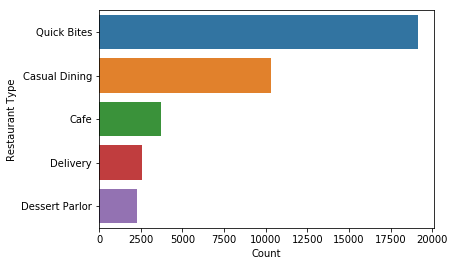

In [20]:
rest_type = df['rest_type'].dropna(axis=0) # Dropping the nulls.
plt.figure()
sns.countplot(y=rest_type, order=rest_type.value_counts().iloc[:5].index)
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

Quick bites dominates the restaurant sector in Bangalore. This does not necessarily mean that quick bites are favorite places to grab a meal for the people in Bangalore or even like those meals, rather, it is the preferred method of eating. One may surmise that the city may be very metropolitan, robust, and/or busy where people usually eat "on-the-go". 


However, if such assumption is true, one may also ask the question, "Why is the delivery count relatively low?". If time is an issue for many workers in the city, wouldn't delivery be a very convenient option for a restaurant to offer? Let's look at the overall rates of restaurants that do have delivery and the reviews from customers.

# Delivery Performance Review

In [21]:
# From the df_rate dataframe, clean up the reviews_list feature by separating the individual rate from the actual review.
reviews = []

for name, rest_type, votes, review in zip(df_rate["name"], df_rate["rest_type"],df_rate["votes"],df_rate["reviews_list"]):
    review = eval(review)
    for n, r in review:
        if n:
            n = n.strip("Rated").strip()
            n = float(n)
            r = r.strip("RATED").strip()
            reviews.append([name,rest_type,votes,n,r])

df_review = pd.DataFrame(reviews, columns=["name","rest_type","votes","single_rate","review"])
df_review['review']=df_review['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

df_review.head()

,name,rest_type,votes,single_rate,review
0,Jalsa,Casual Dining,775,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,Casual Dining,775,4.0,I was here for dinner with my family on a week...
2,Jalsa,Casual Dining,775,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,Casual Dining,775,4.0,We went here on a weekend and one of us had th...
4,Jalsa,Casual Dining,775,5.0,The best thing about the place is its ambiance...


In [22]:
# From the df_review dataframe, filter by delivery type.
df_deliveryreview = df_review[df_review["rest_type"]=="Delivery"] 
print(df_deliveryreview["single_rate"].describe(),'\n')
print("Number of appearances:")
print(df_deliveryreview.groupby(["name"]).size().nlargest(5),'\n\n')
df_deliveryreview.head(n=5)

count    54480.000000
mean         3.335472
std          1.656071
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: single_rate, dtype: float64 

Number of appearances:
name
Knight Ryders                     3565
Midnight Hunger Solutions 24/7    3154
B.M.W - Bhookh Mitaane Wala       2565
eat.fit                           2499
Taza Khaana                       2128
dtype: int64 




,name,rest_type,votes,single_rate,review
1129,Sweet Truth,Delivery,35,4.0,I had the opportunity to try the desserts and ...
1130,Ovenstory Pizza,Delivery,172,4.0,Stumbled upon this on Zomato while checking fo...
1131,Ovenstory Pizza,Delivery,172,5.0,best pizza i have ever had best place and dele...
1132,Ovenstory Pizza,Delivery,172,5.0,I recently ordered from Ovenstory Ovenstory o...
1133,Ovenstory Pizza,Delivery,172,5.0,Amazing pizza with super soft crust and loaded...


In [23]:
# From the df_rate dataframe, filter by delivery type.
df_ratedelivery = df_rate[df_rate["rest_type"]=="Delivery"]
print(df_ratedelivery["rate"].describe(),'\n')
print("Number of appearances:")
print(df_ratedelivery.groupby(["name"]).size().nlargest(5),'\n\n')
df_ratedelivery.head(n=2)

count    1671.000000
mean        3.571215
std         0.416073
min         2.100000
25%         3.300000
50%         3.600000
75%         3.900000
max         4.600000
Name: rate, dtype: float64 

Number of appearances:
name
Sweet Truth        49
eat.fit            37
Behrouz Biryani    30
Firangi Bake       30
FreshMenu          28
dtype: int64 




,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
32,Sweet Truth,Yes,No,3.9,35,Banashankari,Delivery,NaN,"Bakery, Desserts",500.0,"[('Rated 4.0', 'RATED\n I had the opportunity...",Delivery,Banashankari
33,Ovenstory Pizza,Yes,No,3.9,172,Banashankari,Delivery,"Paneer Tikka, Garlic Bread, Thin Crust Pizza, ...",Pizza,750.0,"[('Rated 4.0', 'RATED\n Stumbled upon this on...",Delivery,Banashankari


In [24]:
print("Total number of votes: ",df_ratedelivery['votes'].sum())
print("Total number of reviews: ",len(df_deliveryreview))

Total number of votes:  223700
Total number of reviews:  54480


The two consecutive cells above display two different results for the rates and the the number of appearances of each restaurant. To clear up the confusion, please note the following:


1. The first result (df_deliveryreview) is an unraveled dataframe that separated each review written for each restaurant that may or may not be a franchise with multiple locations. For example, Ovenstory Pizza may have multiple locations with varying number of reviews. The number of appearances represent the number of reviews written for that restaurant company as a whole. The average rate is calculated by taking the mean of the single_rate that was included in the reviews_list.

2. The second result (df_ratedelivery) is from the original dataframe that is filtered by delivery restaurant type. The average rate is calculated by taking the mean of all the votes made by customers which does not necessarily reflect the number of written reviews for that restaurant. The number of appearances represents the total number of locations for that franchise. 


There seems to be no big difference in the means of the two results. Since, the reviews are a sample of the the total votes, it is a good sign that the means are similar. Now, let's see how people feel about the top 10 common delivery restaurants.

In [25]:
def make_word_cloud(df, condition):
    
    fig = plt.figure(figsize=(20,30))
    
    for i, n in enumerate(condition):
        plt.subplot(5,2,i+1)
        rev = df[df["name"]==n]['review'].values.tolist()
        rev=" ".join(x for x in rev)
        wordcloud = WordCloud(
            width = 2000, height = 2000,
            max_words = 30,
            min_font_size = 10,
            background_color="white"
        ).generate(rev)
        
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(n)
        plt.axis("off")
    

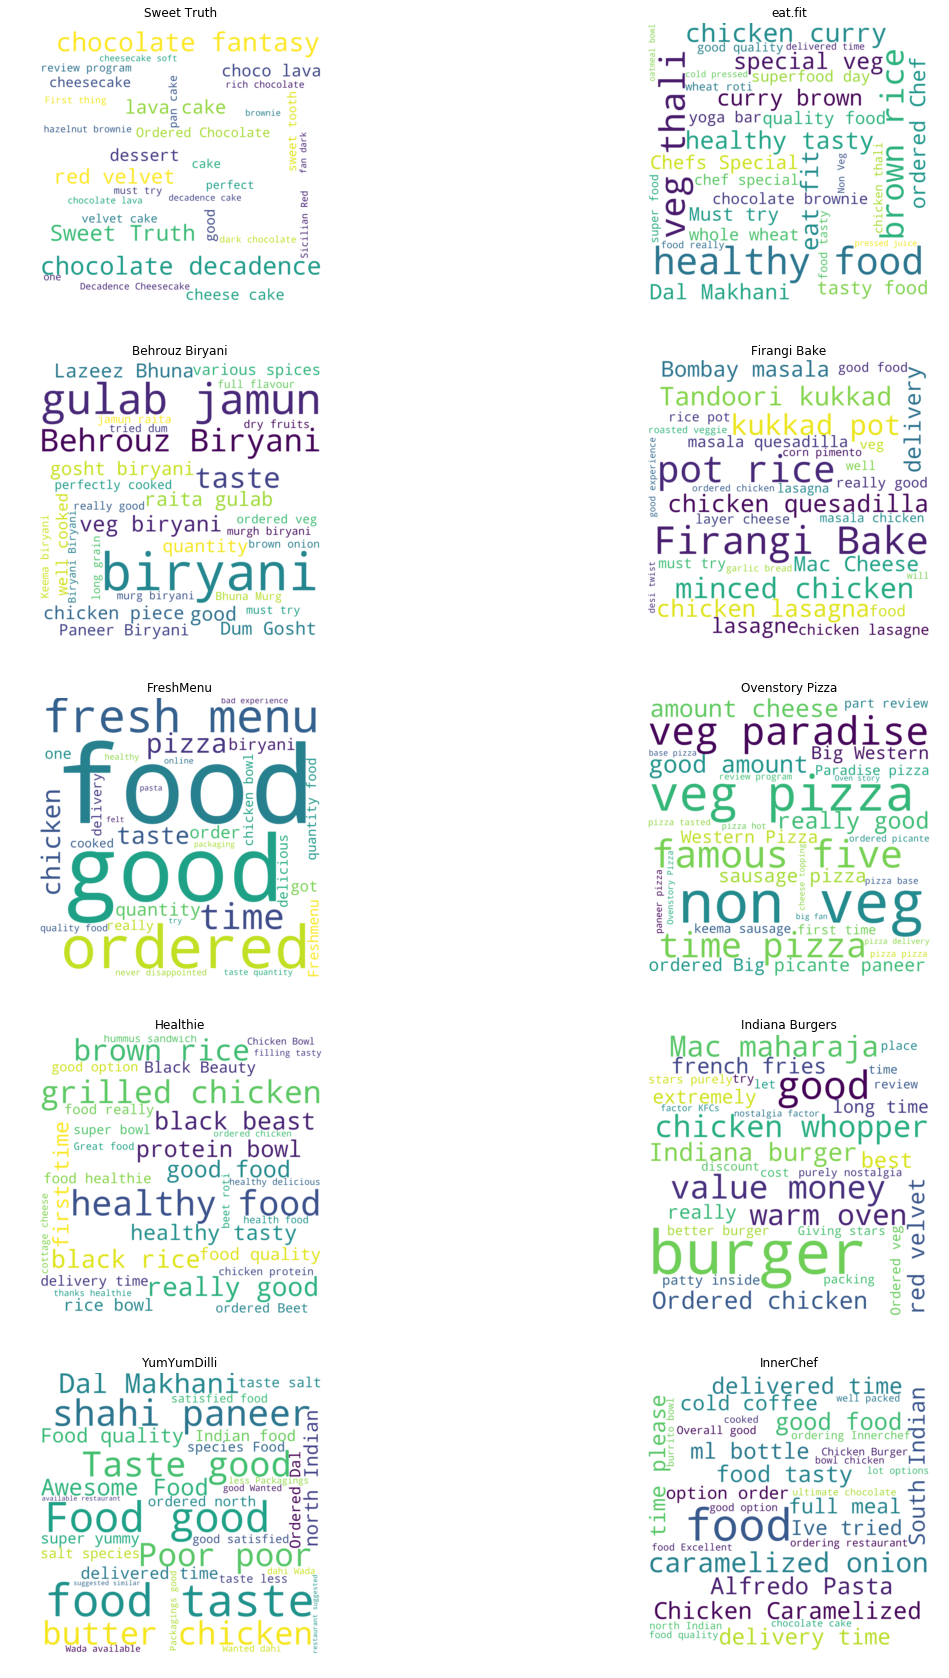

In [26]:
# Top 10 most common delivery restaurants.
top10 = df_ratedelivery.groupby(["name"]).size().nlargest(10)
top10name = top10.index.tolist()

make_word_cloud(df_review, top10name)

In [27]:
average_delivery_rate = df_ratedelivery.groupby(["name"]).mean()

dict_top10 = {}
for x in top10name:
    if x in average_delivery_rate.index:
        dict_top10[x]=average_delivery_rate.loc[x,"rate"]

print("Top 10 delivery restaurants with highest rating\n")
print(average_delivery_rate.nlargest(n=10,columns="rate"),'\n\n')
print("Top 10 delivery restaurants with largest number of locations")
pd.DataFrame.from_dict(dict_top10, orient="index").rename(columns={0:"avg_rate"}).sort_values("avg_rate",ascending=False)

Top 10 delivery restaurants with highest rating

                               rate       votes  approx_cost(for two people)
name                                                                        
eat.fit                    4.478378  799.918919                        500.0
PurpleBasil.in             4.400000  458.000000                        500.0
Aligarh House              4.400000  181.833333                        400.0
Le Gateau - The Cake Shop  4.400000  538.125000                        600.0
nu.tree                    4.366667  286.000000                        400.0
BOX8- Desi Meals           4.300000  248.000000                        500.0
Dream a Dozen              4.300000  133.250000                        300.0
Raat Ki Rani               4.300000  265.500000                        400.0
The Nosh House             4.300000  224.500000                        600.0
Warm Oven                  4.300000  892.111111                        500.0 


Top 10 delivery restaura

,avg_rate
eat.fit,4.478378
Firangi Bake,4.006667
Behrouz Biryani,4.003333
Sweet Truth,3.961224
Ovenstory Pizza,3.960714
Healthie,3.800000
InnerChef,3.700000
FreshMenu,3.607143
YumYumDilli,3.522222
Indiana Burgers,3.383333


Eat.fit is not only the highest rated restaurant but also has the most locations out of all delivery-based restaurants! The wordcloud gives us a gist to the reason why the restaurant is so highly rated. "Tasty, Must try, Healthy, Quality!"


As for the other common restaurants, even though they did not make it to the top 10 rated delivery restaurants, some do have fairly good rates ~3.8 - 4.0. On the other hand, the bottom two (YumYumDilli and Indiana Burgers) are just about average. For YumYumDilli, there seems to be contradictory words such as Good, Poor, Awesome, Tasteless. For Indiana Burgers, the words are more open to interpretation, but based on the 3.38 review, one may surmise that words such as Extremely, Really, and Purely may not necessarily be used as positive adjective/adverbs. 

# Rate and Cost

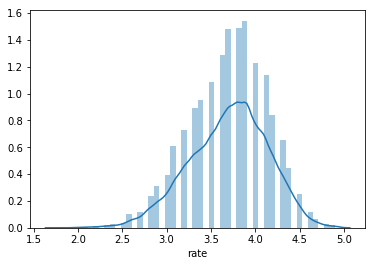

In [28]:
sns.distplot(df_rate["rate"],kde=True)
plt.show()

In [29]:
from scipy.stats import iqr
print("IQR: ",round(iqr(df_rate["rate"]),2))
print("25th percentile: ",np.percentile(df_rate["rate"],25))
print("75th percentile: ",np.percentile(df_rate["rate"], 75))

IQR:  0.6
25th percentile:  3.4
75th percentile:  4.0


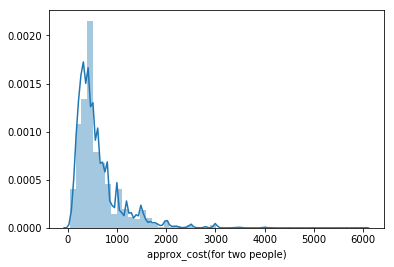

In [30]:
sns.distplot(df_rate["approx_cost(for two people)"])
plt.show()

In [31]:
print("IQR: ",iqr(df_rate["approx_cost(for two people)"]))
print("25th percentile: ",np.percentile(df_rate["approx_cost(for two people)"],25))
print("75th percentile: ",np.percentile(df_rate["approx_cost(for two people)"], 75))

IQR:  400.0
25th percentile:  300.0
75th percentile:  700.0


Let's see how the relationship between cost and the rate.

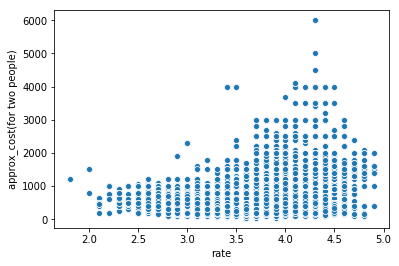

In [32]:
sns.scatterplot(x="rate", y="approx_cost(for two people)", data=df_rate)
plt.show()

From the scatterplot, we can see that costs that range within approximately 1300 have wide array of rates. However, as the costs increase, generally, the rates tend to be higher (no less than a 3.5 rate). 

Now, let's take multiple features into account and see how they affect the rate.

# Multiple Linear Regression

In [33]:
# From the df_rate dataframe, pick out a subset of features.
independent_var = ['rate','online_order','book_table','approx_cost(for two people)']
df_rate_estimator = df_rate[independent_var]
df_rate_estimator.head(n=3)

,rate,online_order,book_table,approx_cost(for two people)
0,4.1,Yes,Yes,800.0
1,4.1,Yes,No,800.0
2,3.8,Yes,No,800.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [35]:
X = df_rate_estimator.loc[:,"online_order":"approx_cost(for two people)"]
y = df_rate_estimator["rate"]

numeric_features = ["approx_cost(for two people)"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ["online_order", "book_table"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

LR_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = LR_preprocessor.fit_transform(X)

# Dummy Variable Trap
drop_dummy = [1,3]
indices = [i for i in range(X.shape[-1]) if i not in drop_dummy]

X = X[:, indices] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

reg = LinearRegression(fit_intercept = True)

reg.fit(X_train, y_train)
print("Model train score: ",reg.score(X_train, y_train))
print("Model test score: ",reg.score(X_test, y_test),'\n')

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print("y_pred_train: ",y_pred_train)
print("y_pred_test: ",y_pred_test, '\n')

print("MSE train: ", mean_squared_error(y_train, y_pred_train))
print("MSE test: ", mean_squared_error(y_test, y_pred_test))

Model train score:  0.22286143110017176
Model test score:  0.21704063859791323 

y_pred_train:  [3.65032574 3.63057538 3.59933744 ... 3.52537398 3.66181332 3.64098802]
y_pred_test:  [4.10177474 4.09243702 3.62016273 ... 3.64098802 3.60975008 3.66181332] 

MSE train:  0.15076905347909317
MSE test:  0.15229056273304784


In [36]:
OLS_X = X.copy()
OLS_X = sm.add_constant(OLS_X) # Must add constant.

OLS_Xtrain, OLS_Xtest, OLS_ytrain, OLS_ytest = train_test_split(OLS_X, y, test_size = 0.3, random_state=5)

OLS=sm.OLS(OLS_ytrain, OLS_Xtrain).fit()
print(OLS.summary())
print(OLS.predict(OLS_Xtest))

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        06:53:00   Log-Likelihood:                -13711.
No. Observations:               28992   AIC:                         2.743e+04
Df Residuals:                   28988   BIC:                         2.746e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5677      0.004    876.307      0.0

Performed Multiple Linear Regression via 2 different coding methods but, as we can see, the results are identical. 


The F-statistics show that there is a relationship between the response and predictors supported by the relatively large value (2771). Since, the number of observations is much larger than the number of predictors (3), F-statistics works well with the given parameters. Furthermore, all 3 predictors are statistically significant as all p-values are 0. However, the R2 value is only 0.223 meaning that the model only explains a small portion of the variance in the response variables. 

Let's try a Logistic Regression.

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
y_log_train = y_train.copy()
y_log_test = y_test.copy()

# Binarize the rates into either pass if less than 3.5 or try if greater than or equal to 3.5.
log_bins = [0, 3.5, 5.0]
log_labels = [0, 1]

y_log_train = pd.DataFrame(y_log_train)
y_log_train["category"] = pd.cut(y_log_train["rate"],log_bins,labels=log_labels)

y_log_test = pd.DataFrame(y_log_test)
y_log_test["category"] = pd.cut(y_log_test["rate"],log_bins,labels=log_labels)

In [39]:
log_X = X.copy()
log_X = sm.add_constant(log_X) # Must add constant.

log_Xtrain, log_Xtest, log_ytrain, log_ytest = train_test_split(log_X, y, test_size = 0.3, random_state=5)

log_model = sm.Logit(y_log_train["category"], log_Xtrain).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.566218
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               category   No. Observations:                28992
Model:                          Logit   Df Residuals:                    28988
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.1190
Time:                        06:53:00   Log-Likelihood:                -16416.
converged:                       True   LL-Null:                       -18633.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1109      0.023      4.748      0.000       0.065       0.157
x1             0.6348      0.024     26.517      0.000       0.588       0.682
x2             0.7323      0.028     26.107      0.000       0.677       0.787
x3             2.2007      0.094     23.443      0.000       2.017       2.385
==============================================================================
"""

p-values for all variables are all statistically significant.

In [40]:
log = LogisticRegression()
log.fit(X_train, y_log_train["category"])

log_pred = log.predict(X_test)
print("Accuracy of logistic regression: ",log.score(X_test, y_log_test["category"]),'\n')

target_names = ['pass', 'try']
clf_report = classification_report(y_log_test["category"], log_pred, target_names = target_names)
print(clf_report)

Accuracy of logistic regression:  0.6816352808627072 

              precision    recall  f1-score   support

        pass       0.57      0.31      0.40      4270
         try       0.71      0.87      0.78      8156

   micro avg       0.68      0.68      0.68     12426
   macro avg       0.64      0.59      0.59     12426
weighted avg       0.66      0.68      0.65     12426



Not the most optimal accuracy value. Since, we split the dataset into train and test, focus on the micro average. The precision tells us out of all predicted postive, how many are actually positive. The recall tells us the amount of positives that were actually classified as positive. As you can see, the precision, recall, fscore, and accuracy all have the same value.

In [41]:
confusion = confusion_matrix(y_log_test["category"], log_pred)
print(confusion)

[[1334 2936]
 [1020 7136]]


There are fair amount of incorrect predictions (false positve: 2936, false negative: 1020). As we see from the accuracy score (68%), this was expected.

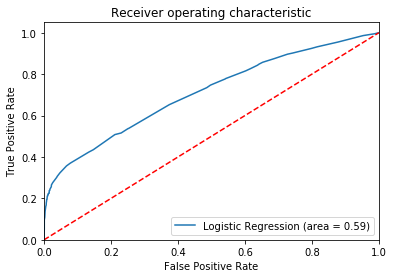

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_log_test["category"].tolist(), log_pred)
fpr, tpr, thresholds = roc_curve(y_log_test["category"], log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression is a poor model in distinguishing whether a restaurant is worth trying. Since the AUC is very close to 0.5, the model has a weak capacity for class separation.

# Support Vector Machine

In [43]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [44]:
y_log_train["category"]

25823    1
20159    1
40704    1
11791    1
42715    1
14610    1
2668     1
40030    1
33386    0
42971    0
34569    0
1293     1
48727    0
19293    1
49250    1
21041    1
41270    1
11456    1
49967    0
49826    1
44538    0
35307    1
34055    1
32372    1
8426     1
37737    1
7831     1
44528    1
2687     1
44434    1
        ..
46133    0
51091    1
20535    1
47658    1
20038    1
21048    1
2745     0
25306    1
39808    1
43419    1
45234    1
10491    0
34827    1
37799    1
44885    1
40785    0
36197    1
9455     1
25396    0
3381     0
43978    1
43397    1
20139    1
41868    1
42258    1
6801     1
44736    0
25768    0
23450    0
44548    0
Name: category, Length: 28992, dtype: category
Categories (2, int64): [0 < 1]

In [45]:
# Using the log datasets.

param_grid = {
    'C':[1,10,100],
    'kernel':['linear','rbf','sigmoid'],
    'gamma':[1,0.1,0.01]
    
}

clf_svm = svm.SVC()
grid_svm = GridSearchCV(clf_svm,param_grid,cv=3,scoring="balanced_accuracy")
grid_svm.fit(log_Xtrain,y_log_train["category"].astype(int))

print("Best score: ", grid_svm.best_score_)
print("Best parameters: ", grid_svm.best_params_)
print("Balanced accuracy: ",grid_svm.score(log_Xtest,y_log_test["category"]))

Best score:  0.604281322737285
Best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Balanced accuracy:  0.6016756388595687


SVM is no more, actually, less accurate than logistic regression.